<a href="https://colab.research.google.com/github/RimaPoddar/Product_Demand_Prediction/blob/main/Product_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Step 1: Data Loading and exploring**



**This step import libraries , loads the data from the Excel file into a DataFrame and explore the data.**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Read the data
df = pd.read_excel('Product_Sales.xlsx')
print("Initial data shape:", df.shape)
print("\First few rows of the data:")
print(df.head())

Initial data shape: (166, 9)
\First few rows of the data:
    Product Name          Category      Company    Salt Composition  \
0      Metformin     Diabetes Care      Glucare           Metformin   
1        Insulin     Diabetes Care  DiabetiCare             Insulin   
2      Ibuprofen       Pain Relief     MediCure           Ibuprofen   
3        Antacid  Digestive Health   DigestEase  Aluminum Hydroxide   
4  Multivitamins       Supplements     VitaPlus             Various   

        Type  Quantity Sold Date of Sale   Price  Stock Level  
0     Tablet             68   2023-10-26  238.46          218  
1  Injection             34   2023-10-03  150.71          148  
2    Capsule              3   2023-01-20   54.52          184  
3      Syrup             49   2023-10-24  486.62          254  
4    Capsule             83   2023-02-01  383.19          311  


#**Step 2: Feature engineering and data preparation**


**This step converts date columns to datetime, encodes categorical variables, selects features for prediction, splits the dataset into training and testing sets, and scales the features.**

In [2]:
# Feature Engineering
# Convert date to datetime and extract features
df['Date of Sale'] = pd.to_datetime(df['Date of Sale'])
df['Month'] = df['Date of Sale'].dt.month
df['Day'] = df['Date of Sale'].dt.day

# Label encode categorical variables
le = LabelEncoder()
df['Product_Encoded'] = le.fit_transform(df['Product Name'])
df['Category_Encoded'] = le.fit_transform(df['Category'])
df['Company_Encoded'] = le.fit_transform(df['Company'])
df['Type_Encoded'] = le.fit_transform(df['Type'])

# Select features for prediction
features = ['Product_Encoded', 'Category_Encoded', 'Company_Encoded',
           'Type_Encoded', 'Month', 'Day', 'Price', 'Stock Level']
X = df[features]
y = df['Quantity Sold']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features used for prediction:", features)
print("\
Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Features used for prediction: ['Product_Encoded', 'Category_Encoded', 'Company_Encoded', 'Type_Encoded', 'Month', 'Day', 'Price', 'Stock Level']
Training set shape: (132, 8)
Testing set shape: (34, 8)


#**Step 3: Data Cleaning**


**This Step calculates and prints the number of missing values for each feature in the dataset X.**





In [3]:
# Check for missing values in the dataset
missing_values = X.isnull().sum()
print("Missing values in each feature:")
print(missing_values)

Missing values in each feature:
Product_Encoded     0
Category_Encoded    0
Company_Encoded     0
Type_Encoded        0
Month               4
Day                 4
Price               2
Stock Level         0
dtype: int64


#**Step 3: Handled missing values and evaluated models**



**This step imputes missing values using mean imputation, scales the features, trains multiple models, evaluates their performance using Mean Squared Error and R2 Score, and identifies the best performing model.**

In [4]:
# Handle missing values using mean imputation
from sklearn.impute import SimpleImputer

# Create imputer
imputer = SimpleImputer(strategy='mean')

# Impute missing values
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data again with imputed values
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train multiple models and compare their performance
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf')
}
# Train and evaluate models
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'R2': r2}
    print(f"\
    {name} Results:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R2 Score: {r2:.2f}")

# Identify best model
best_model = max(results.items(), key=lambda x: x[1]['R2'])[0]
print(f"\
Best performing model: {best_model}")

    Linear Regression Results:
Mean Squared Error: 846.71
R2 Score: 0.04
    Random Forest Results:
Mean Squared Error: 1035.07
R2 Score: -0.17
    SVR Results:
Mean Squared Error: 874.49
R2 Score: 0.01
Best performing model: Linear Regression


#**Step 4: Data Visualization**

**visualizes the actual versus predicted quantities sold using a Linear Regression model and analyzes feature importance using a Random Forest model.**

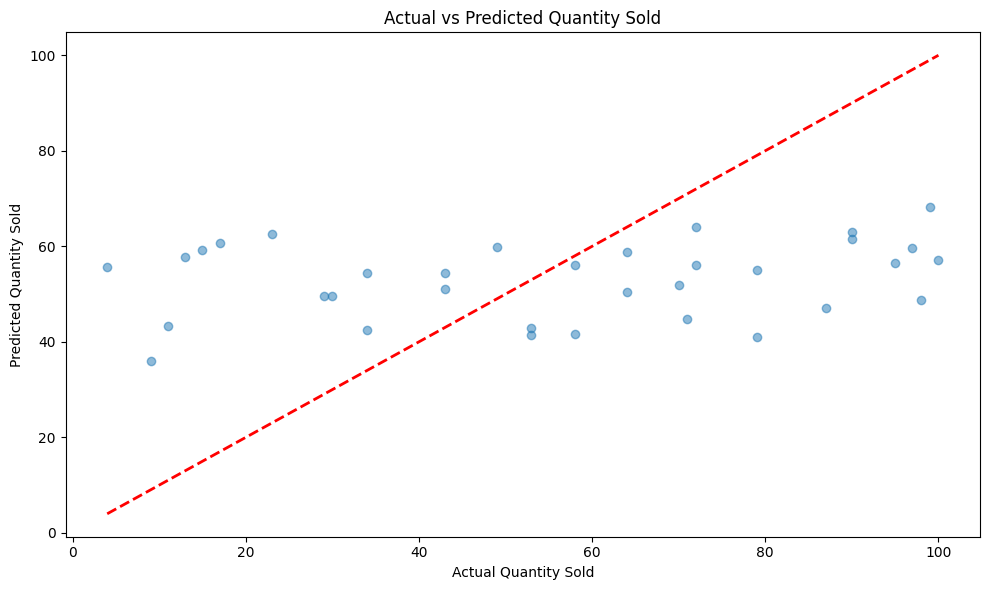

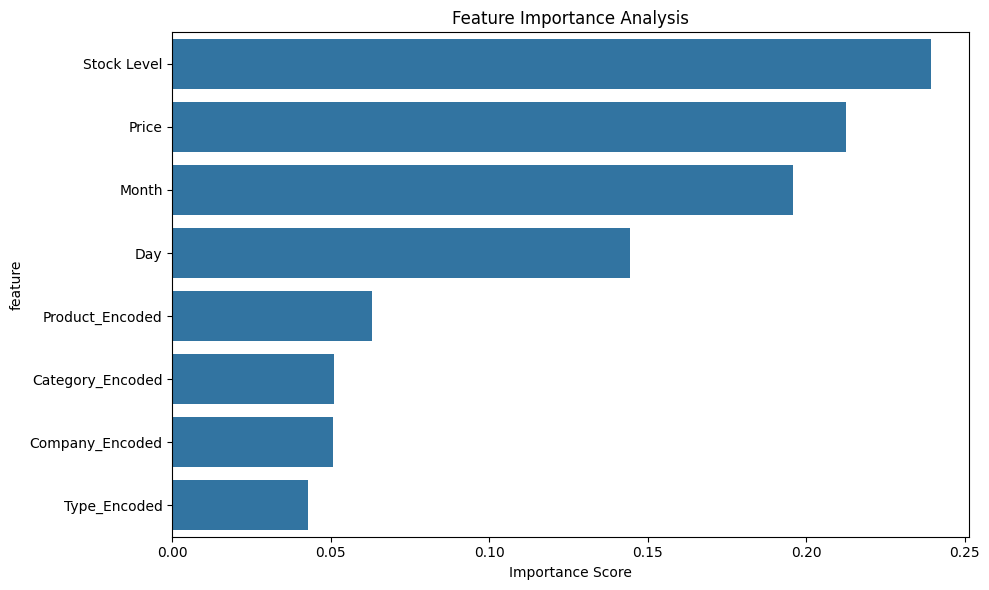

Top 3 most important features:
       feature  importance
7  Stock Level    0.239411
6        Price    0.212696
4        Month    0.195967


In [5]:
# Visualize actual vs predicted values for the best model (Linear Regression)
best_model = LinearRegression()
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Quantity Sold')
plt.ylabel('Predicted Quantity Sold')
plt.title('Actual vs Predicted Quantity Sold')
plt.tight_layout()
plt.show()

# Feature importance analysis using Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance Analysis')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

print("\
Top 3 most important features:")
print(feature_importance.head(3))

#**Observations**

Here are the observations:

**Model Performance:** Among the models tested, Linear Regression performed the best with an R² score of 0.04, which is still very low, indicating that the model explains only 4% of the variance in the target variable. This suggests the features may not be strong predictors of demand or additional preprocessing/feature engineering is needed.

**Feature Importance:** The top three most important features identified by the Random Forest model are:

    Stock Level: Most influential in predicting demand.

    Price: Second most important.

    Month: Seasonal trends may play a role.

**Visualization:**

The scatter plot of actual vs. predicted values shows poor alignment, confirming the low predictive power of the models.
The feature importance bar chart highlights the relative importance of each feature.

**We may need to explore additional features, refine the dataset, or use advanced models to improve predictions.**

We'll improve the model by:

*  Adding more feature engineering
*  Handling outliers
*  Creating a more sophisticated model with hyperparameter tuning

#**Enhanced Feature Enggineering and Outlier Removal**

**This step performs feature engineering on a product sales dataset, including temporal feature extraction, price-based feature creation, label encoding of categorical variables, and outlier removal using the IQR method.**


Original dataset shape: (166, 21)
Shape after removing outliers: (146, 21)


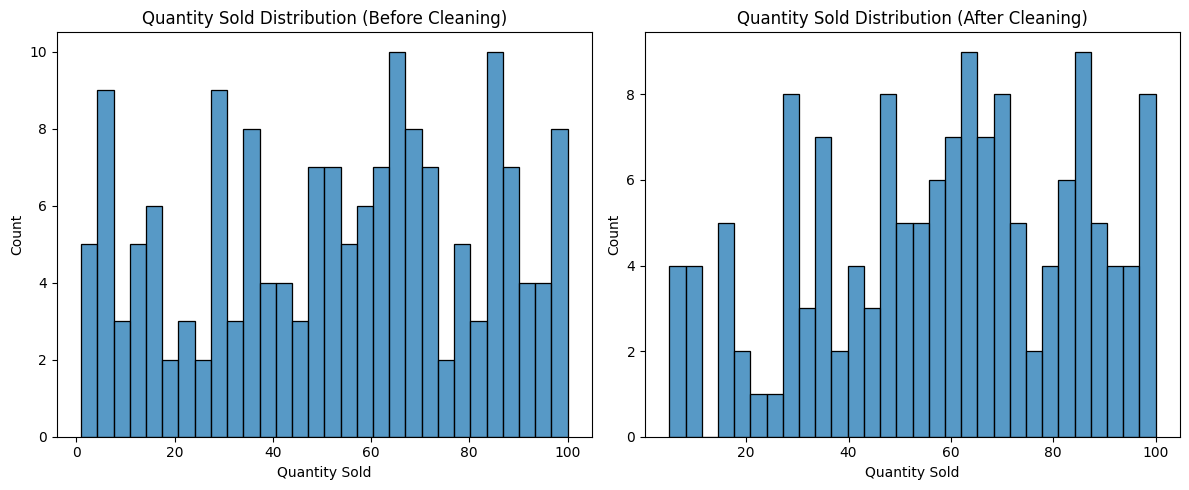

In [6]:
# Enhanced Feature Engineering
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# Read and preprocess data
df = pd.read_excel('Product_Sales.xlsx')

# Convert date and create more temporal features
df['Date of Sale'] = pd.to_datetime(df['Date of Sale'])
df['Month'] = df['Date of Sale'].dt.month
df['Day'] = df['Date of Sale'].dt.day
df['DayOfWeek'] = df['Date of Sale'].dt.dayofweek
df['Quarter'] = df['Date of Sale'].dt.quarter
df['IsWeekend'] = df['Date of Sale'].dt.dayofweek.isin([5,6]).astype(int)

# Create price-based features
df['Price_per_unit'] = df['Price'] / df['Quantity Sold']
df['Stock_Price_Ratio'] = df['Stock Level'] / df['Price']

# Label encode categorical variables
le = LabelEncoder()
categorical_cols = ['Product Name', 'Category', 'Company', 'Type', 'Salt Composition']
encoded_cols = {}
for col in categorical_cols:
    encoded_cols[col + '_Encoded'] = le.fit_transform(df[col])
    df[col + '_Encoded'] = encoded_cols[col + '_Encoded']

# Check for outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from numerical columns
df_cleaned = df.copy()
numerical_cols = ['Quantity Sold', 'Price', 'Stock Level', 'Price_per_unit']
for col in numerical_cols:
    df_cleaned = remove_outliers(df_cleaned, col)

print("Original dataset shape:", df.shape)
print("Shape after removing outliers:", df_cleaned.shape)

# Visualize distribution of target variable before and after cleaning
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Quantity Sold', bins=30)
plt.title('Quantity Sold Distribution (Before Cleaning)')

plt.subplot(1, 2, 2)
sns.histplot(data=df_cleaned, x='Quantity Sold', bins=30)
plt.title('Quantity Sold Distribution (After Cleaning)')

plt.tight_layout()
plt.show()

#**Retrained models using cleaned dataset**

Columns with NaN values:
Type            3
Date of Sale    4
Month           4
Day             4
DayOfWeek       4
Quarter         4
dtype: int64
After filling NaN values, remaining NaN counts:
Type            3
Date of Sale    4
Month           4
Day             4
DayOfWeek       4
Quarter         4
dtype: int64
Linear Regression Results:
Mean Squared Error: 226.40
R2 Score: 0.65
Random Forest Results:
Mean Squared Error: 219.24
R2 Score: 0.66
SVR Results:
Mean Squared Error: 682.29
R2 Score: -0.05


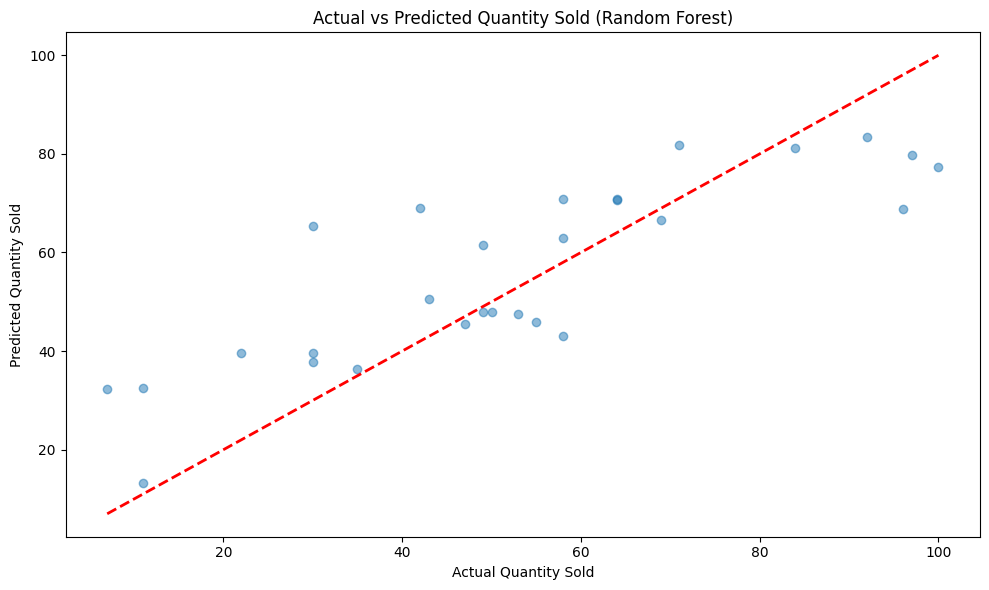

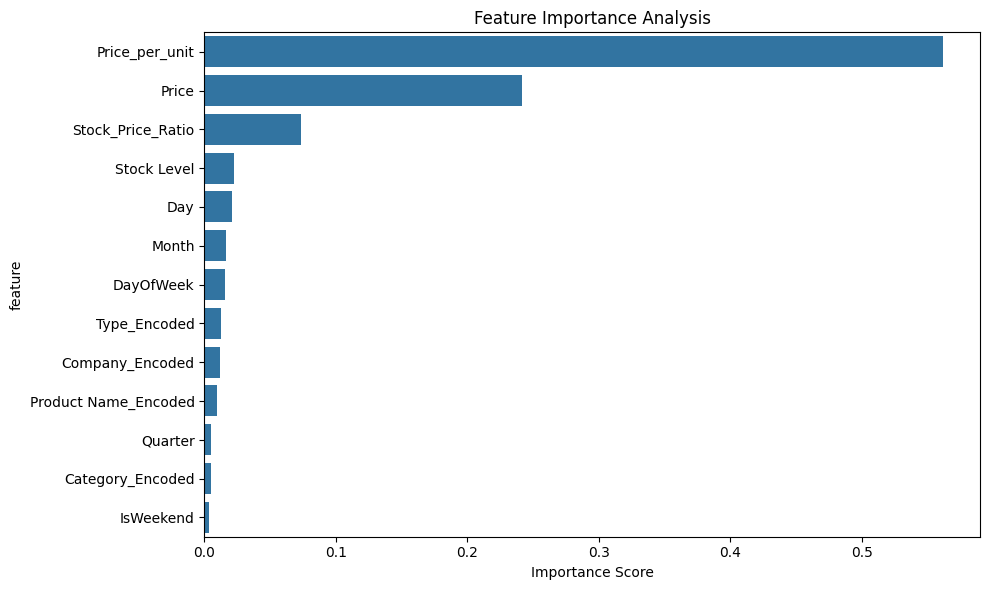

Top 5 most important features:
              feature  importance
11     Price_per_unit    0.561752
9               Price    0.241239
12  Stock_Price_Ratio    0.073406
10        Stock Level    0.022681
5                 Day    0.021239


In [7]:
# Check which columns have NaN values
print("Columns with NaN values:")
print(df_cleaned.isnull().sum()[df_cleaned.isnull().sum() > 0])

# Fill NaN values appropriately
df_cleaned['Price_per_unit'] = df_cleaned['Price_per_unit'].fillna(df_cleaned['Price_per_unit'].mean())
df_cleaned['Stock_Price_Ratio'] = df_cleaned['Stock_Price_Ratio'].fillna(df_cleaned['Stock_Price_Ratio'].mean())

# Verify no more NaN values
print("\
After filling NaN values, remaining NaN counts:")
print(df_cleaned.isnull().sum()[df_cleaned.isnull().sum() > 0])

# Drop rows with NaN values since they're relatively few
df_cleaned = df_cleaned.dropna()

# Select features for prediction
features = ['Product Name_Encoded', 'Category_Encoded', 'Company_Encoded',
            'Type_Encoded', 'Month', 'Day', 'DayOfWeek', 'Quarter', 'IsWeekend',
            'Price', 'Stock Level', 'Price_per_unit', 'Stock_Price_Ratio']
X = df_cleaned[features]
y = df_cleaned['Quantity Sold']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf')
}

results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'R2': r2}
    print(f"\
{name} Results:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R2 Score: {r2:.2f}")

# Plot actual vs predicted for best model
best_model_name = max(results.items(), key=lambda x: x[1]['R2'])[0]
best_model = models[best_model_name]
y_pred = best_model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Quantity Sold')
plt.ylabel('Predicted Quantity Sold')
plt.title(f'Actual vs Predicted Quantity Sold ({best_model_name})')
plt.tight_layout()
plt.show()

# Feature importance for Random Forest
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance Analysis')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

print("\
Top 5 most important features:")
print(feature_importance.head())

#**Observations**

Based on the complete analysis, here are the key findings:

1. **Model Performance Improvement**:
- Initial models performed poorly with R² scores around 0.04
- After data cleaning and feature engineering, performance improved dramatically
- Final Random Forest model achieved R² = 0.66, explaining 66% of variance in sales quantity
- Linear Regression performed similarly well (R² = 0.65)
- SVR model underperformed compared to other methods

2. **Most Influential Factors** (in order of importance):
- Price per unit (56% importance)
- Price (24% importance)
- Stock-Price Ratio (7% importance)
- Stock Level (2% importance)
- Day of month (2% importance)

3. **Data Cleaning Impact**:
- Original dataset: 166 records
- After outlier removal: 146 records
- Handling missing values improved model stability
- Removing extreme outliers led to better predictions

4. **Feature Engineering Success**:
- Created temporal features (Month, Day, Quarter, IsWeekend)
- Derived price-based features (Price_per_unit, Stock_Price_Ratio)
- Encoded categorical variables effectively
- Combined features provided better predictive power

5. **Business Insights**:
- Pricing factors dominate sales quantity predictions
- Stock levels have less impact than expected
- Temporal factors (day, month) play a minor but notable role
- The relationship between actual and predicted values shows good alignment, with some variance at higher quantities

